In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [12]:
df1 = pd.read_csv("country_data.csv")
df2 = pd.read_csv("geographies.csv")

df1.head()

,Unnamed: 0,X,country,Year,Population,Carbon_Footprint_percapita,gini_index,life_expectancy_years,median_income_perhousehold,deaths_natural_disasters
0,1,19898,Afghanistan,1900,4.88M,NaN,39.7,33.5,753.0,NaN
1,2,19899,Angola,1900,3.12M,NaN,38.2,32.8,233.0,NaN
2,3,19900,Albania,1900,819k,NaN,26.4,34.9,583.0,NaN
3,4,19901,Andorra,1900,4660,NaN,NaN,NaN,NaN,NaN
4,5,19902,United Arab Emirates,1900,46.7k,NaN,52.0,35.6,1210.0,NaN


In [13]:
df2.head()

,geo,name,four_regions,eight_regions,Latitude,Longitude,income groups
0,aus,Australia,asia,east_asia_pacific,-25.0,135.00000,High income
1,brn,Brunei,asia,east_asia_pacific,4.5,114.66667,High income
2,khm,Cambodia,asia,east_asia_pacific,13.0,105.00000,Lower middle income
3,chn,China,asia,east_asia_pacific,35.0,105.00000,Upper middle income
4,fji,Fiji,asia,east_asia_pacific,-18.0,178.00000,Upper middle income


In [14]:
df = pd.merge(df1, df2, how='inner', left_on='country', right_on='name')
df.head()

,Unnamed: 0,X,country,Year,Population,Carbon_Footprint_percapita,gini_index,life_expectancy_years,median_income_perhousehold,deaths_natural_disasters,geo,name,four_regions,eight_regions,Latitude,Longitude,income groups
0,1,19898,Afghanistan,1900,4.88M,NaN,39.7,33.5,753.0,NaN,afg,Afghanistan,asia,asia_west,33.0,66.0,Low income
1,198,20095,Afghanistan,1901,4.94M,NaN,40.0,33.7,755.0,NaN,afg,Afghanistan,asia,asia_west,33.0,66.0,Low income
2,395,20292,Afghanistan,1902,5M,NaN,40.3,33.9,758.0,NaN,afg,Afghanistan,asia,asia_west,33.0,66.0,Low income
3,592,20489,Afghanistan,1903,5.06M,NaN,40.6,34.1,761.0,NaN,afg,Afghanistan,asia,asia_west,33.0,66.0,Low income
4,789,20686,Afghanistan,1904,5.13M,NaN,40.9,34.3,764.0,NaN,afg,Afghanistan,asia,asia_west,33.0,66.0,Low income


In [15]:
df.columns

Index(['Unnamed: 0', 'X', 'country', 'Year', 'Population',
       'Carbon_Footprint_percapita', 'gini_index', 'life_expectancy_years',
       'median_income_perhousehold', 'deaths_natural_disasters', 'geo', 'name',
       'four_regions', 'eight_regions', 'Latitude', 'Longitude',
       'income groups'],
      dtype='object')

In [16]:
df.head()

,Unnamed: 0,X,country,Year,Population,Carbon_Footprint_percapita,gini_index,life_expectancy_years,median_income_perhousehold,deaths_natural_disasters,geo,name,four_regions,eight_regions,Latitude,Longitude,income groups
0,1,19898,Afghanistan,1900,4.88M,NaN,39.7,33.5,753.0,NaN,afg,Afghanistan,asia,asia_west,33.0,66.0,Low income
1,198,20095,Afghanistan,1901,4.94M,NaN,40.0,33.7,755.0,NaN,afg,Afghanistan,asia,asia_west,33.0,66.0,Low income
2,395,20292,Afghanistan,1902,5M,NaN,40.3,33.9,758.0,NaN,afg,Afghanistan,asia,asia_west,33.0,66.0,Low income
3,592,20489,Afghanistan,1903,5.06M,NaN,40.6,34.1,761.0,NaN,afg,Afghanistan,asia,asia_west,33.0,66.0,Low income
4,789,20686,Afghanistan,1904,5.13M,NaN,40.9,34.3,764.0,NaN,afg,Afghanistan,asia,asia_west,33.0,66.0,Low income


In [17]:
yr_region_df = df.groupby(['Year', 'eight_regions'])['Carbon_Footprint_percapita'].mean().reset_index()
yr_region_df.columns = ['Year', 'eight_regions', 'avg_carbon']

yr_region_df.dropna(inplace=True)
yr_region_df.head()


,Year,eight_regions,avg_carbon
632,1979,africa_north,6.361667
633,1979,africa_sub_saharan,3.459023
634,1979,america_north,8.332778
635,1979,america_south,9.360000
636,1979,asia_west,20.280577


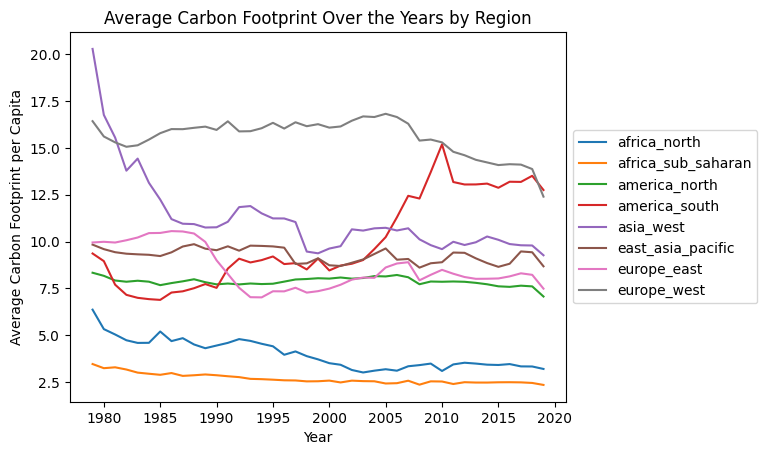

In [18]:
for region in yr_region_df['eight_regions'].unique():
    region_data = yr_region_df[yr_region_df['eight_regions'] == region]
    plt.plot(region_data['Year'], region_data['avg_carbon'], label=region)

plt.xlabel('Year')
plt.ylabel('Average Carbon Footprint per Capita')
plt.title('Average Carbon Footprint Over the Years by Region')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [28]:
per_country_df = df.groupby('name').agg(
    avg_carb = pd.NamedAgg(column = 'Carbon_Footprint_percapita', aggfunc = 'mean'),
    avg_household_inc = pd.NamedAgg(column = 'median_income_perhousehold', aggfunc = 'mean')
).reset_index()


per_country_df = pd.merge(per_country_df, df2, on='name', how='inner')
per_country_df.dropna(inplace=True)

per_country_df.head()

,name,avg_carb,avg_household_inc,geo,four_regions,eight_regions,Latitude,Longitude,income groups
0,Afghanistan,0.924341,1048.258333,afg,asia,asia_west,33.00,66.0,Low income
1,Albania,2.771951,1554.233333,alb,europe,europe_east,41.00,20.0,Upper middle income
2,Algeria,3.934390,1554.458333,dza,africa,africa_north,28.00,3.0,Upper middle income
4,Angola,3.320488,829.975000,ago,africa,africa_sub_saharan,-12.50,18.5,Lower middle income
5,Antigua and Barbuda,12.429268,3735.490566,atg,americas,america_north,17.05,-61.8,High income


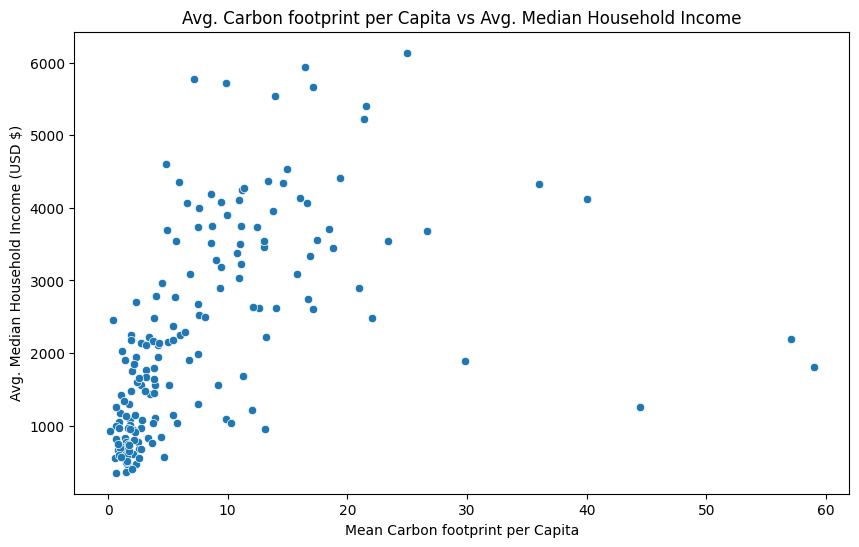

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming per_country_df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='avg_carb', y='avg_household_inc', data=per_country_df)

# Set labels and title
plt.xlabel('Mean Carbon footprint per Capita')
plt.ylabel('Avg. Median Household Income (USD $)')
plt.title('Avg. Carbon footprint per Capita vs Avg. Median Household Income')

plt.show()
